In [163]:
import pandas as pd

data0=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
data0.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [164]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

df=pd.DataFrame(data0)
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [165]:
df1=df.copy()

In [166]:
df1=df1[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [168]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [169]:
df1=df1.rename({'Price':'pr','Age_08_04':'ag','KM':'k','HP':'h','cc':'c','Doors':'do','Gears':'ge','Quarterly_Tax':'qt','Weight':'wt'},axis=1)

In [170]:
df1.head()

,pr,ag,k,h,c,do,ge,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


<AxesSubplot:>

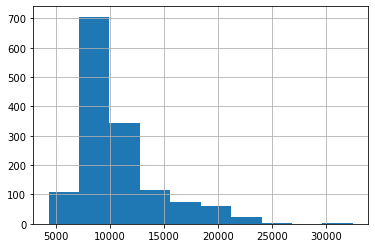

In [171]:
df1['pr'].hist()

<AxesSubplot:>

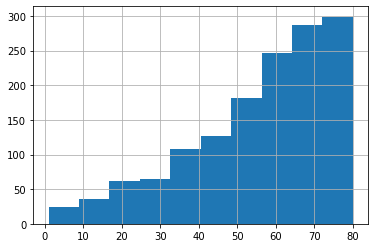

In [172]:
df1['ag'].hist()

<AxesSubplot:>

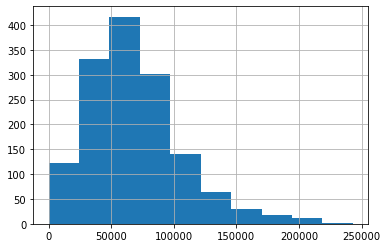

In [173]:
df1['k'].hist()

<AxesSubplot:>

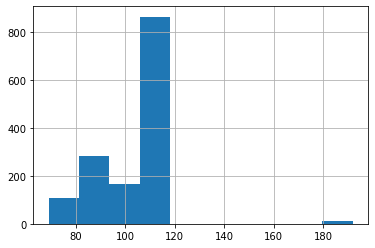

In [174]:
df1['h'].hist()

<AxesSubplot:>

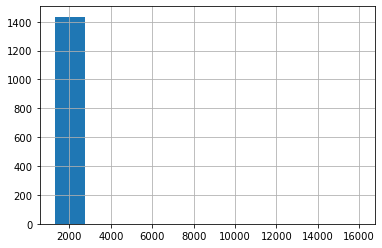

In [175]:
df1['c'].hist()

<AxesSubplot:>

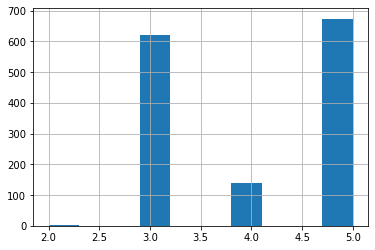

In [176]:
df1['do'].hist()

<AxesSubplot:>

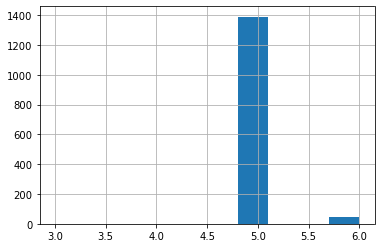

In [177]:
df1['ge'].hist()

<AxesSubplot:>

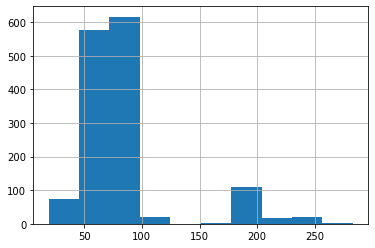

In [178]:
df1['qt'].hist()

<AxesSubplot:>

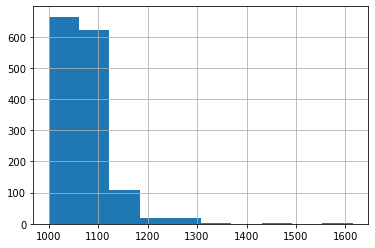

In [179]:
df1['wt'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x25e6e126190>,
 'caps': [<matplotlib.lines.Line2D at 0x25e6e126850>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e6e116df0>],
 'medians': [<matplotlib.lines.Line2D at 0x25e6e126f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e6e1e12b0>],
 'means': []}

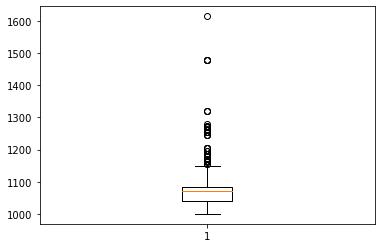

In [180]:
plt.boxplot(df1['wt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e6e224e80>,
 'caps': [<matplotlib.lines.Line2D at 0x25e6e233580>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e6e224b20>],
 'medians': [<matplotlib.lines.Line2D at 0x25e6e233be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e6e233f40>],
 'means': []}

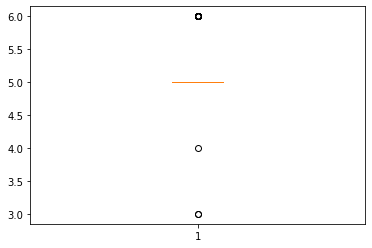

In [181]:
plt.boxplot(df1['ge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e6e282c10>,
 'caps': [<matplotlib.lines.Line2D at 0x25e6e290340>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e6e2828b0>],
 'medians': [<matplotlib.lines.Line2D at 0x25e6e290a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e6e290d60>],
 'means': []}

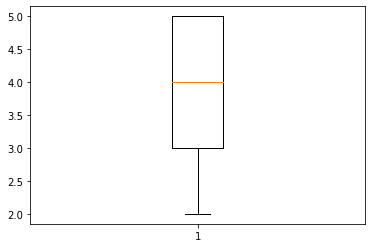

In [182]:
plt.boxplot(df1['do'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e6e2e49a0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e6e2f00a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e6e2e4640>],
 'medians': [<matplotlib.lines.Line2D at 0x25e6e2f0760>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e6e2f0ac0>],
 'means': []}

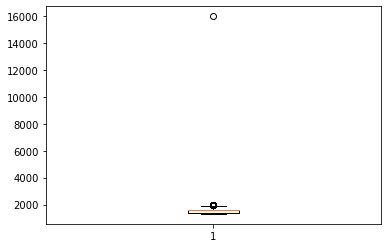

In [183]:
plt.boxplot(df1['c'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e6e33ebb0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e6e34d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e6e33e850>],
 'medians': [<matplotlib.lines.Line2D at 0x25e6e34d970>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e6e34dcd0>],
 'means': []}

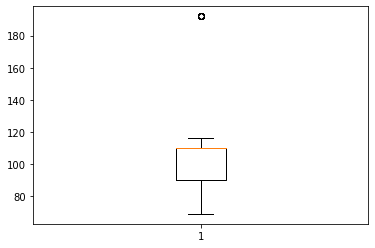

In [184]:
plt.boxplot(df1['h'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e6e3a0460>,
 'caps': [<matplotlib.lines.Line2D at 0x25e6e3a0b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e6e3a0100>],
 'medians': [<matplotlib.lines.Line2D at 0x25e6e3aa220>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e6e3aa580>],
 'means': []}

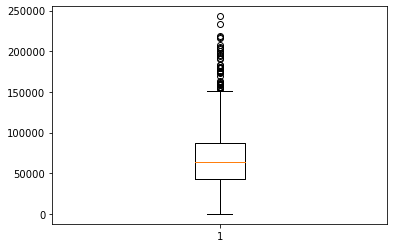

In [185]:
plt.boxplot(df1['k'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e6e3f2cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e6e4013d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e6e3f2970>],
 'medians': [<matplotlib.lines.Line2D at 0x25e6e401a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e6e401df0>],
 'means': []}

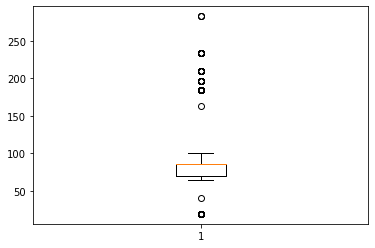

In [186]:
plt.boxplot(df1['qt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e6e5b70d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e6e5b7790>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e6e5a7d30>],
 'medians': [<matplotlib.lines.Line2D at 0x25e6e5b7e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e6e5bf1f0>],
 'means': []}

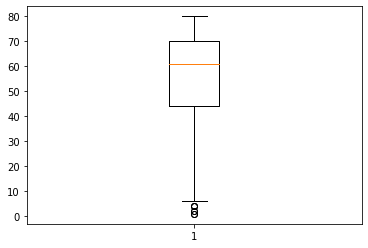

In [187]:
plt.boxplot(df1['ag'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e6e610790>,
 'caps': [<matplotlib.lines.Line2D at 0x25e6e610e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e6e610430>],
 'medians': [<matplotlib.lines.Line2D at 0x25e6e61c550>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e6e61c8b0>],
 'means': []}

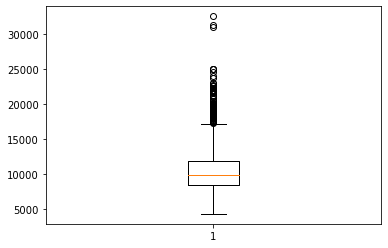

In [188]:
plt.boxplot(df1['pr'])

In [160]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#data=scaler.fit_transform(df1)
#data=pd.DataFrame(data,index=df1.index,columns=df1.columns)
#data.head()

In [211]:
df1.corr()

,pr,ag,k,h,c,do,ge,qt,wt
pr,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
ag,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
k,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
h,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
c,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
do,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
ge,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qt,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
wt,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


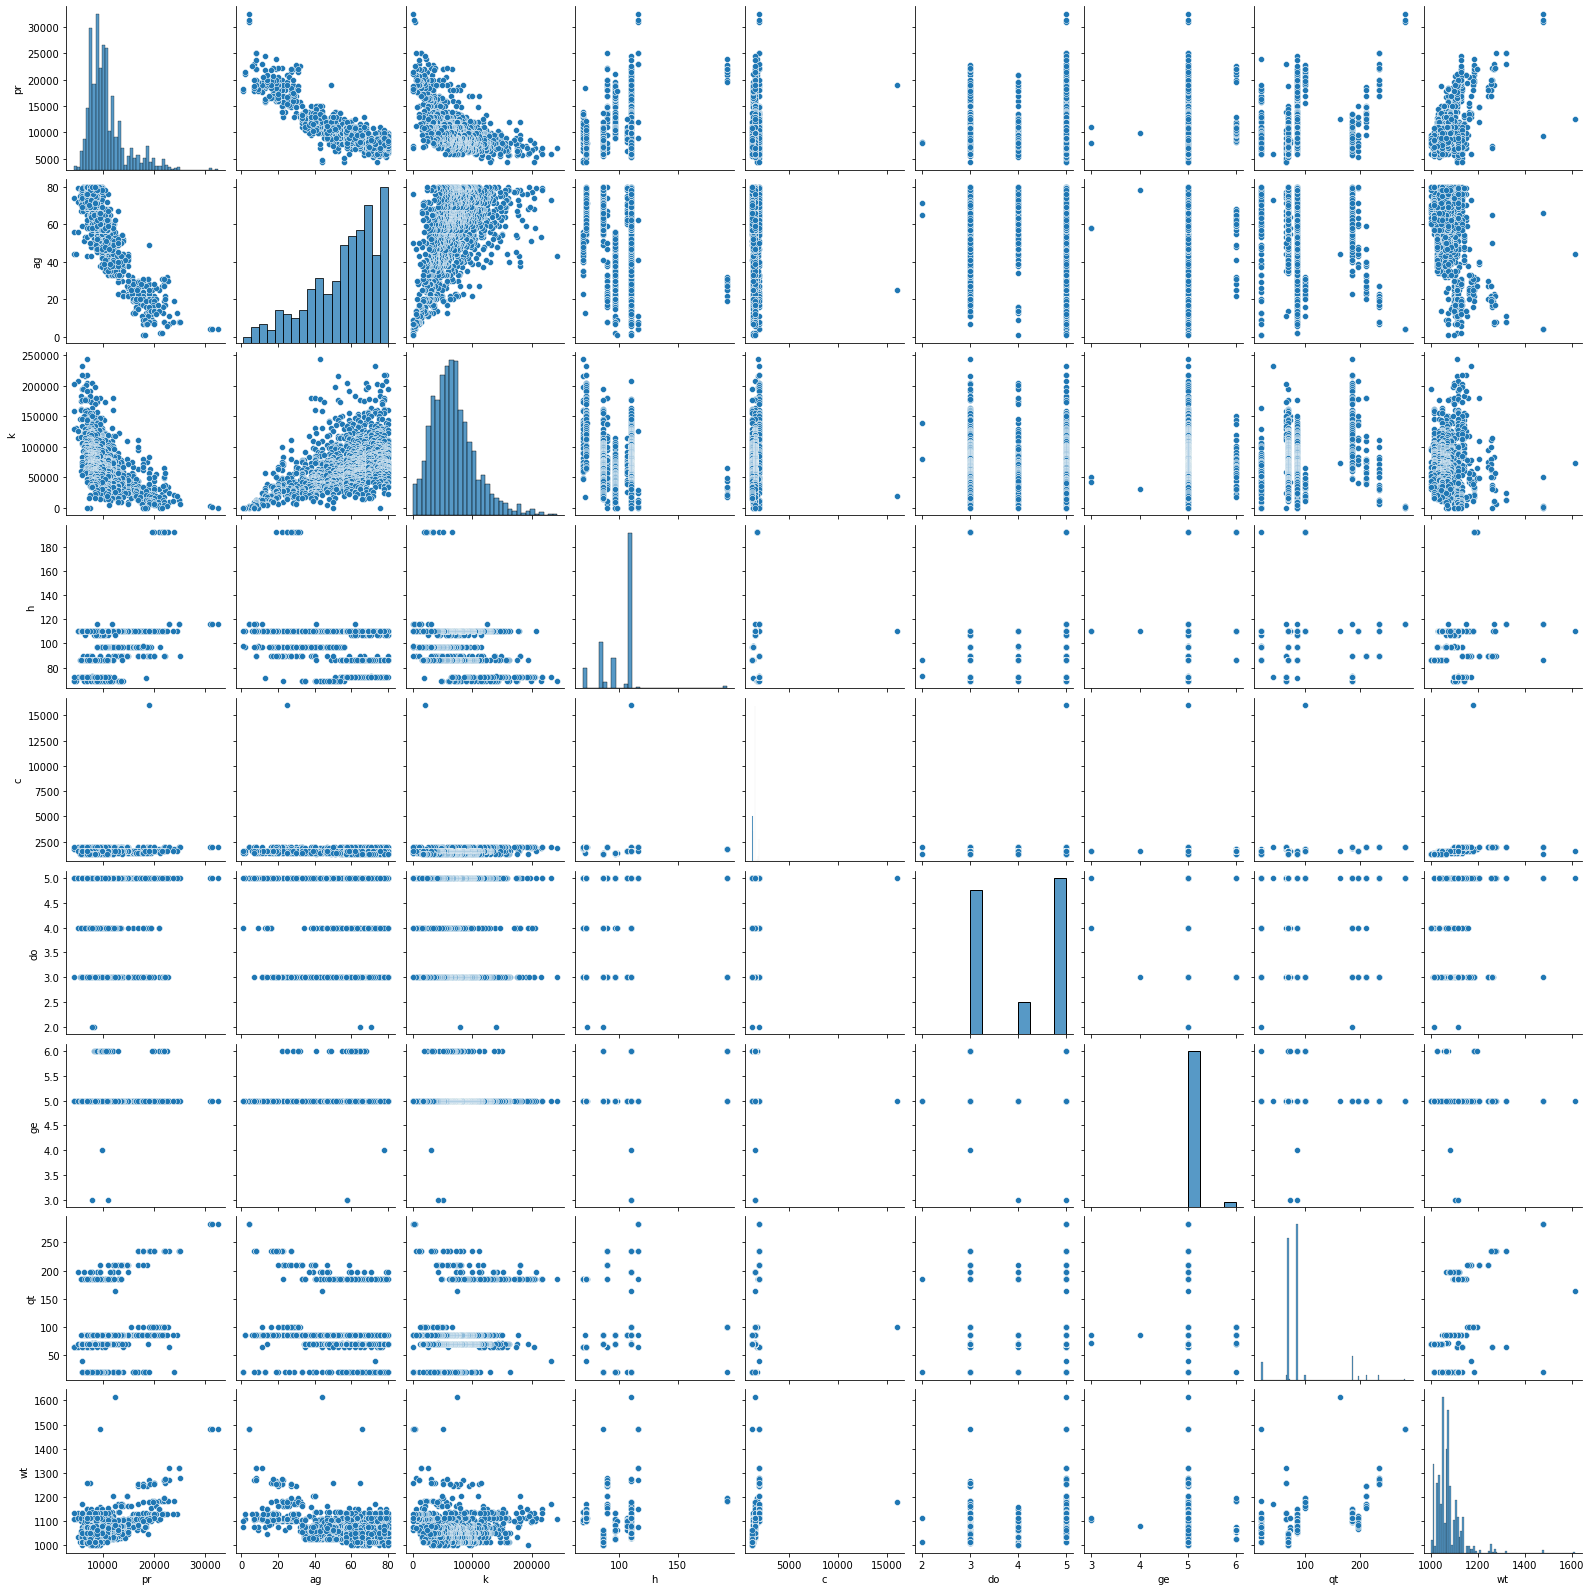

In [212]:
import statsmodels.formula.api as smf
model=smf.ols('pr~ag+k+h+c+do+ge+qt+wt',data=df1).fit()
sns.pairplot(df1)

In [213]:
model.params

Intercept   -5573.106358
ag           -121.658402
k              -0.020817
h              31.680906
c              -0.121100
do             -1.616641
ge            594.319936
qt              3.949081
wt             16.958632
dtype: float64

In [214]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.948666
ag          -46.511852
k           -16.621622
h            11.241018
c            -1.344222
do           -0.040410
ge            3.016007
qt            3.014535
wt           15.879803
dtype: float64 
 Intercept     8.241949e-05
ag           3.354724e-288
k             7.538439e-57
h             3.757218e-28
c             1.790902e-01
do            9.677716e-01
ge            2.606549e-03
qt            2.619148e-03
wt            2.048576e-52
dtype: float64


In [215]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:52:43   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
ag          -121.6584      2.616    -46.512      0.000    -126.789    -116.527
k             -0.0208      0.001    -16.622      0.000      -0.023      -0.018
h             31.6809      2.818     11.241      0.000      26.152      37.209
c             -0.1211      0.090     -1.344      0.179      -0.298       0.056
do            -1.6166     40.006     -0.040      0.968     -80.093      76.859
ge           594.3199    197.055      3.016      0.003     207.771     980.869
qt             3.9491      1.310      3.015      0.003       1.379       6.519
wt            16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
m1_wt=smf.ols('pr~wt',data=data).fit()
print(m1_wt.tvalues,'\n',m1_wt.pvalues)

Intercept    1.108957e-14
wt           2.704586e+01
dtype: float64 
 Intercept     1.000000e+00
wt           1.630487e-130
dtype: float64


In [217]:
m1_qt=smf.ols('pr~qt',data=data).fit()
print(m1_qt.tvalues,'\n',m1_qt.pvalues)

Intercept    9.249214e-15
qt           8.507487e+00
dtype: float64 
 Intercept    1.000000e+00
qt           4.407393e-17
dtype: float64


In [218]:
m1_wtqt=smf.ols('pr~wt+qt',data=data).fit()
print(m1_wtqt.tvalues,'\n',m1_wtqt.pvalues)

Intercept    1.138578e-14
wt           2.720342e+01
qt          -8.867243e+00
dtype: float64 
 Intercept     1.000000e+00
wt           1.000921e-131
qt            2.179869e-18
dtype: float64


In [219]:
rsq_age=smf.ols('ag~k+h+wt+c+qt+ge+do',data=data).fit().rsquared
vif_age=1-(1-rsq_age)

In [220]:
rsq_k=smf.ols('k~ag+h+wt+c+qt+ge+do',data=data).fit().rsquared
vif_k=1-(1-rsq_k)

In [221]:
rsq_h=smf.ols('h~ag+k+wt+c+qt+ge+do',data=data).fit().rsquared
vif_h=1-(1-rsq_h)

In [222]:
rsq_wt=smf.ols('wt~ag+k+h+c+qt+ge+do',data=data).fit().rsquared
vif_wt=1-(1-rsq_wt)

In [223]:
rsq_c=smf.ols('c~ag+k+h+wt+qt+ge+do',data=data).fit().rsquared
vif_c=1-(1-rsq_c)

In [224]:
rsq_qt=smf.ols('qt~ag+k+h+wt+c+ge+do',data=data).fit().rsquared
vif_qt=1-(1-rsq_qt)

In [225]:
rsq_ge=smf.ols('ge~ag+k+h+wt+c+qt+do',data=data).fit().rsquared
vif_ge=1-(1-rsq_ge)

In [226]:
rsq_do=smf.ols('do~ag+k+h+wt+c+ge+qt',data=data).fit().rsquared
vif_do=1-(1-rsq_do)

In [227]:
d1=({'Variables':['do','ag','k','h','wt','c','qt','ge'],'VIF':[vif_do,vif_ge,vif_qt,vif_c,vif_wt,
                                                                            vif_h,vif_k,vif_age]})
VIF_Variables=pd.DataFrame(d1)
VIF_Variables

,Variables,VIF
0,do,0.135378
1,ag,0.089853
2,k,0.567368
3,h,0.140815
4,wt,0.602610
5,c,0.295488
6,qt,0.430817
7,ge,0.469389


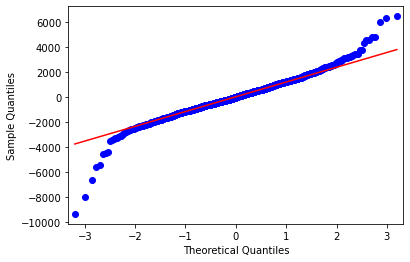

In [228]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

In [229]:
list(np.where(model.resid<-3000))

[array([   0,  189,  191,  192,  221,  254,  292,  321,  370,  393,  402,
         463,  601,  654,  960, 1382, 1435], dtype=int64)]

In [230]:
list(np.where(model.resid>3000))

[array([  16,   52,   62,   74,   80,   91,  109,  110,  111,  115,  125,
         141,  147,  154,  161,  171,  179,  523,  557,  796, 1054, 1058,
        1079, 1402], dtype=int64)]

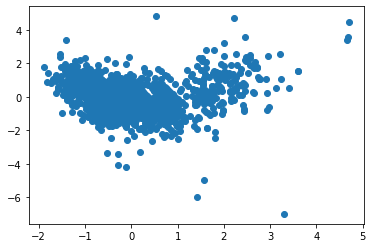

In [231]:
def get_standardized_values (vals):
    return (vals-vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.show()

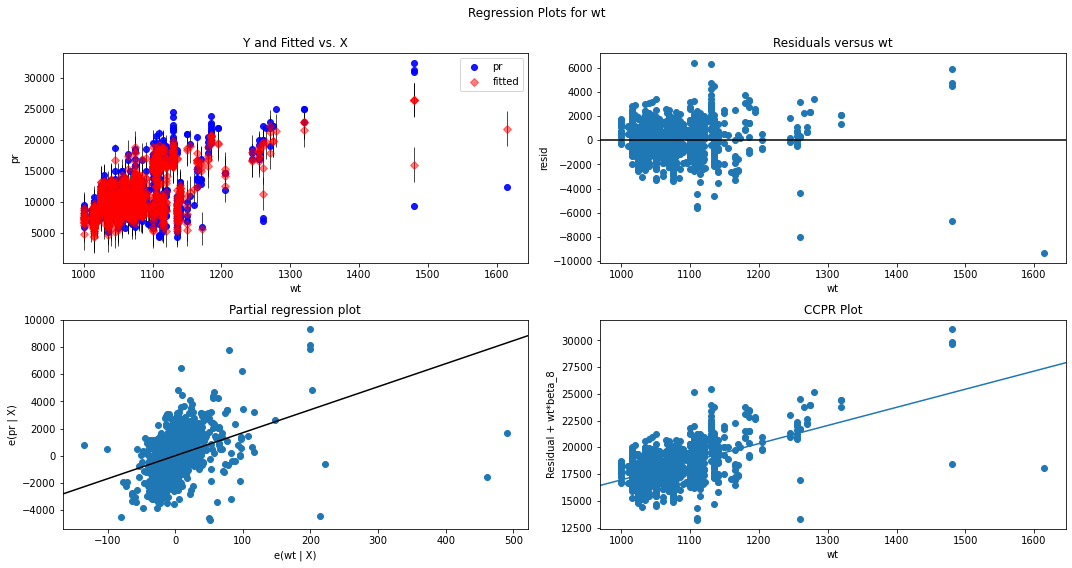

In [232]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'wt',fig=fig)

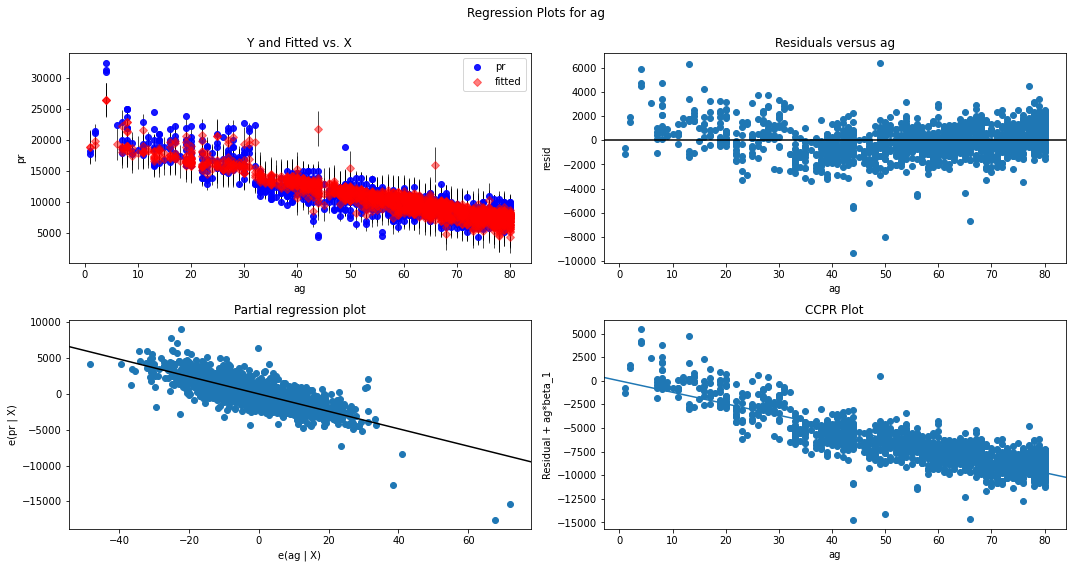

In [233]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'ag',fig=fig)

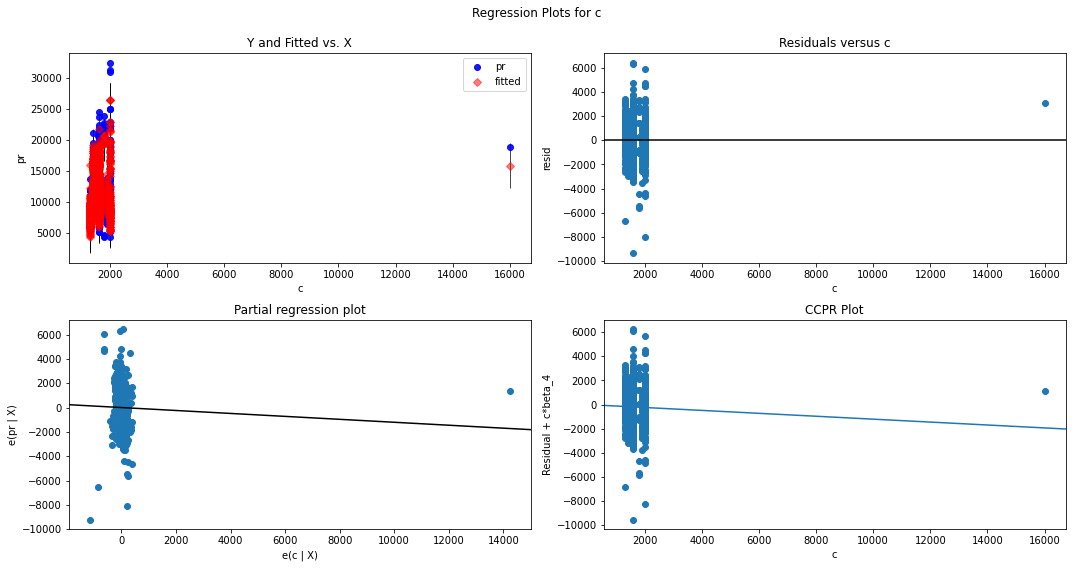

In [234]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'c',fig=fig)

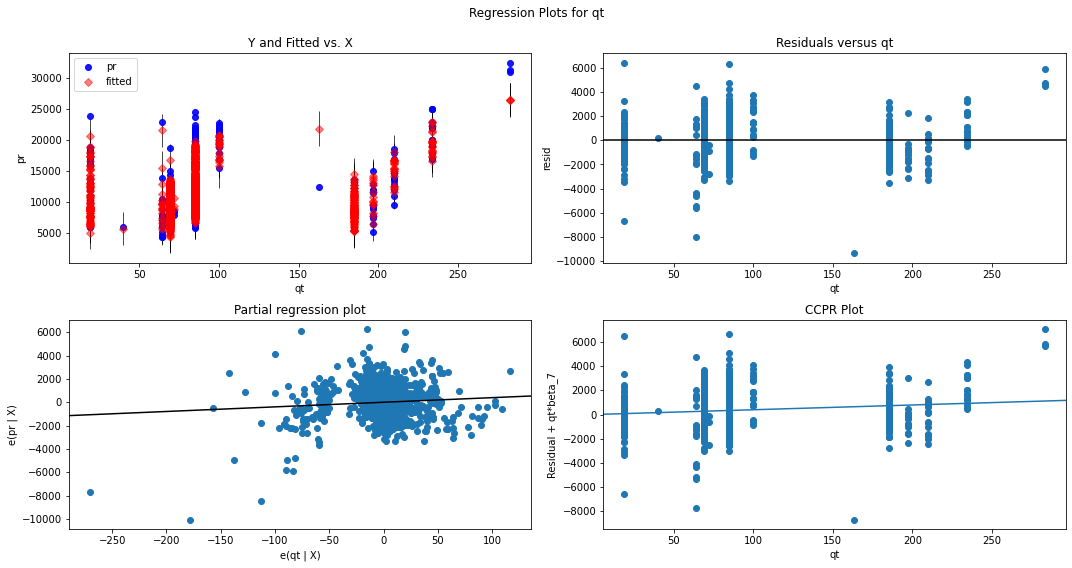

In [235]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'qt',fig=fig)

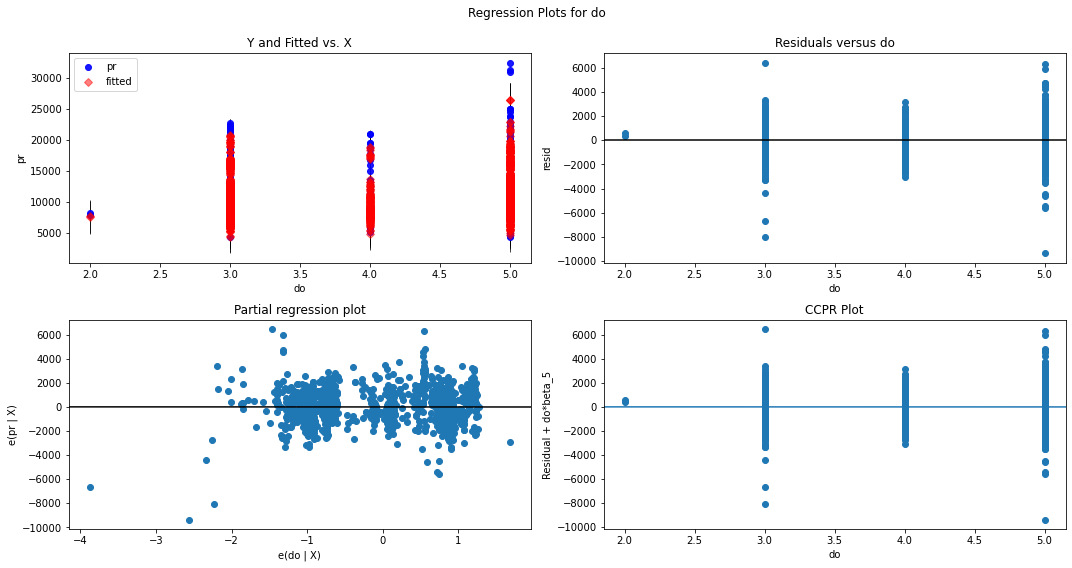

In [236]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'do',fig=fig)

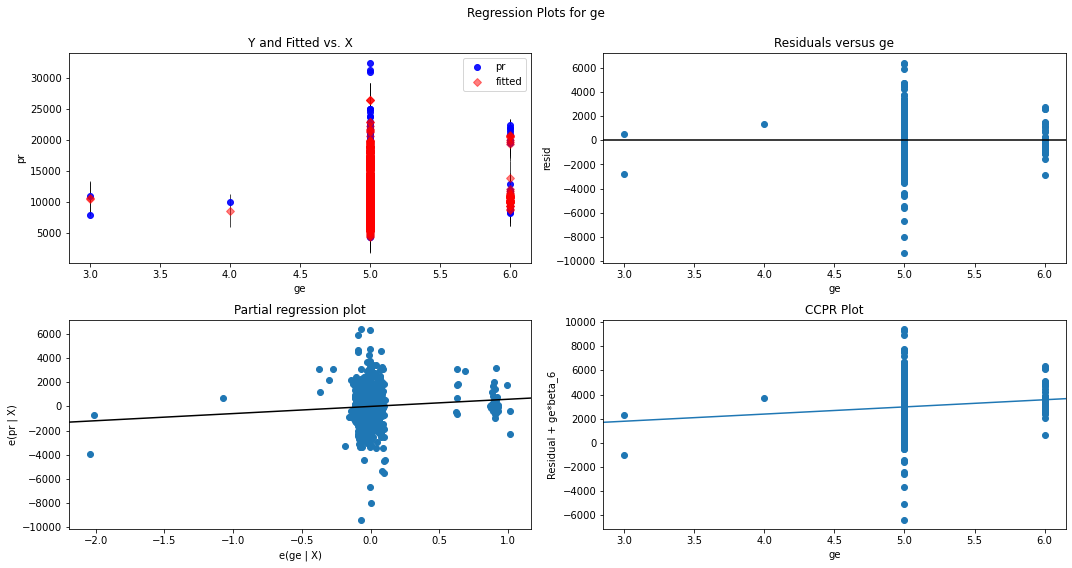

In [237]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'ge',fig=fig)

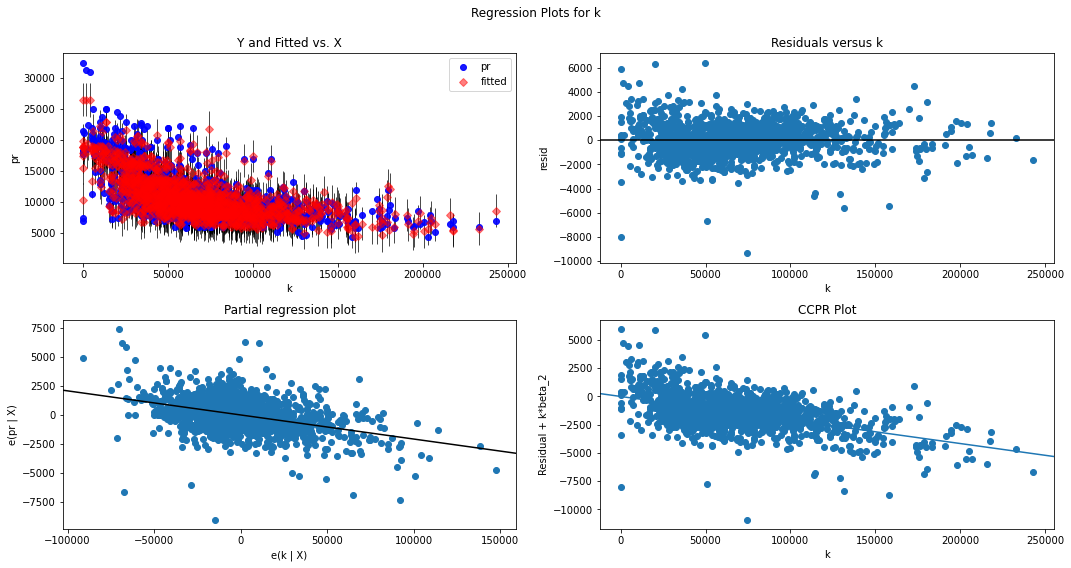

In [238]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'k',fig=fig)

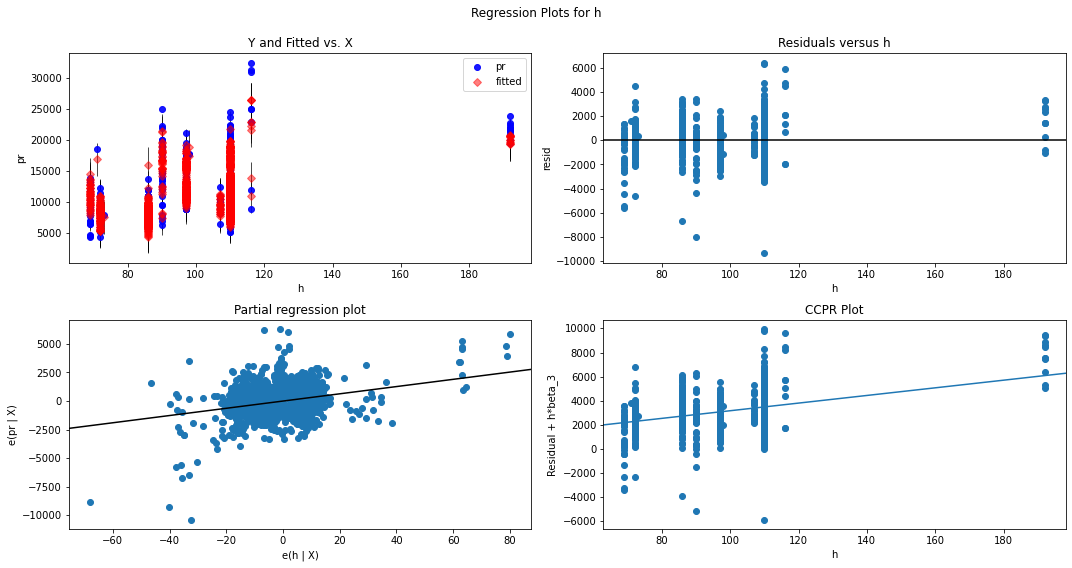

In [239]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'h',fig=fig)

In [241]:
df1[df1.index.isin([16,52,62,74,80,91,109,110,111,114,124,140,146,153,160,170,178,522,556,795,1053,1057,1078,1401,0,188,190,191,220,253,291,320,369,392,401,462,600,653,959,1381,1434])]

,pr,ag,k,h,c,do,ge,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
16,22750,30,34000,192,1800,3,5,100,1185
52,20500,26,56000,110,1600,5,5,100,1180
62,18750,31,36544,110,1600,5,5,85,1130
74,19950,28,28000,110,1600,5,5,85,1130
80,18950,25,20019,110,16000,5,5,100,1180
91,22250,20,37500,90,2000,3,5,234,1260
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480


In [242]:
df2=df1.copy()

In [249]:
df1=df1.drop(df1.index[[16,52,62,74,80,91,109,110,111,114,124,140,146,153,160,170,178,522,556,795,1053,1057,1078,1401,0,188,190,191,220,253,291,320,369,392,401,462,600,653,959,1381,1434]],axis=0).reset_index()


In [250]:
df1.head()

,index,pr,ag,k,h,c,do,ge,qt,wt
0,1,13750,23,72937,90,2000,3,5,210,1165
1,2,13950,24,41711,90,2000,3,5,210,1165
2,3,14950,26,48000,90,2000,3,5,210,1165
3,4,13750,30,38500,90,2000,3,5,210,1170
4,5,12950,32,61000,90,2000,3,5,210,1170


In [251]:
df1=df1.drop('index',axis=1)

In [252]:
df1.head()

,pr,ag,k,h,c,do,ge,qt,wt
0,13750,23,72937,90,2000,3,5,210,1165
1,13950,24,41711,90,2000,3,5,210,1165
2,14950,26,48000,90,2000,3,5,210,1165
3,13750,30,38500,90,2000,3,5,210,1170
4,12950,32,61000,90,2000,3,5,210,1170


In [254]:
df1.dtypes

pr    int64
ag    int64
k     int64
h     int64
c     int64
do    int64
ge    int64
qt    int64
wt    int64
dtype: object

In [255]:
df1.shape

(1395, 9)

In [259]:
df1.tail()

,pr,ag,k,h,c,do,ge,qt,wt
1390,8450,80,23000,86,1300,3,5,69,1015
1391,7500,69,20544,86,1300,3,5,69,1025
1392,10845,72,19000,86,1300,3,5,69,1015
1393,8500,71,17016,86,1300,3,5,69,1015
1394,6950,76,1,110,1600,5,5,19,1114


In [260]:
df1[df1.duplicated()].shape

(1, 9)

In [261]:
df1[df1.duplicated()]

,pr,ag,k,h,c,do,ge,qt,wt
103,24950,8,13253,116,2000,5,5,234,1320


In [266]:
df1=df1.drop_duplicates()
df1.shape

(1394, 9)

In [264]:
model1=smf.ols('pr~ag+k+h+c+do+ge+qt+wt',data=df1).fit()
print(model1.tvalues,'\n',model1.pvalues)

Intercept    -2.727722
ag          -47.879824
k           -13.605451
h            12.332233
c            -6.242180
do            0.242137
ge            3.301828
qt            5.177373
wt           14.500819
dtype: float64 
 Intercept     6.457897e-03
ag           5.548064e-296
k             1.163568e-39
h             3.137054e-33
c             5.725180e-10
do            8.087100e-01
ge            9.850447e-04
qt            2.582007e-07
wt            1.818463e-44
dtype: float64


In [267]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1056.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:06:10   Log-Likelihood:                -11939.
No. Observations:                1394   AIC:                         2.390e+04
Df Residuals:                    1385   BIC:                         2.394e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3776.5803   1384.518     -2.728      0.006   -6492.559   -1060.602
ag          -121.9742      2.548    -47.880      0.000    -126.972    -116.977
k             -0.0173      0.001    -13.605      0.000      -0.020      -0.015
h             35.8158      2.904     12.332      0.000      30.119      41.513
c             -1.9268      0.309     -6.242      0.000      -2.532      -1.321
do             9.4006     38.823      0.242      0.809     -66.758      85.559
ge           619.5233    187.630      3.302      0.001     251.453     987.594
qt             7.3411      1.418      5.177      0.000       4.560      10.123
wt            16.8642      1.163     14.501      0.000      14.583      19.146
==============================================================================
Omnibus:                      157.529   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1224.757
Skew:                          -0.183   Prob(JB):                    1.12e-266
Kurtosis:                       7.577   Cond. No.                     3.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<StemContainer object of 3 artists>

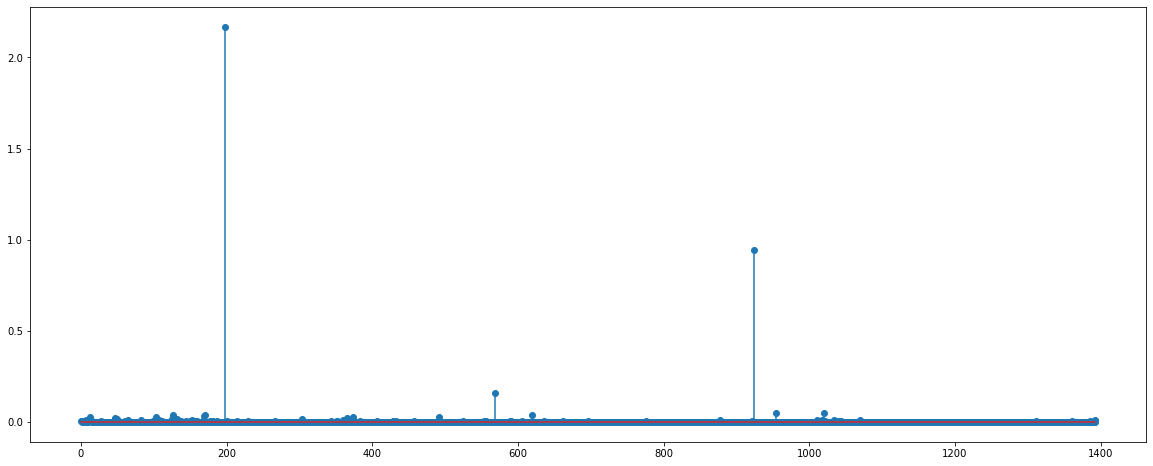

In [271]:
model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance
fig=plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(df1)),np.round(c,3))


In [272]:
(np.argmax(c),np.max(c))

(198, 2.1682310894902717)

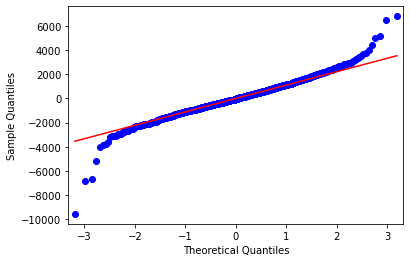

In [273]:
qqplot=sm.qqplot(model1.resid,line='q')

In [276]:
list(np.where(model1.resid<-4000))

[array([170, 198, 365, 568, 924], dtype=int64)]

In [277]:
list(np.where(model1.resid>4000))

[array([ 103,  112,  132,  153,  492, 1020], dtype=int64)]

In [278]:
df1=df1.drop(df1.index[[170, 198, 365, 568, 924,103,  112,  132,  153,  492, 1020]],axis=0).reset_index()

In [279]:
df1.head()

,index,pr,ag,k,h,c,do,ge,qt,wt
0,0,13750,23,72937,90,2000,3,5,210,1165
1,1,13950,24,41711,90,2000,3,5,210,1165
2,2,14950,26,48000,90,2000,3,5,210,1165
3,3,13750,30,38500,90,2000,3,5,210,1170
4,4,12950,32,61000,90,2000,3,5,210,1170


In [280]:
df1=df1.drop('index',axis=1)

In [281]:
df1.head()

,pr,ag,k,h,c,do,ge,qt,wt
0,13750,23,72937,90,2000,3,5,210,1165
1,13950,24,41711,90,2000,3,5,210,1165
2,14950,26,48000,90,2000,3,5,210,1165
3,13750,30,38500,90,2000,3,5,210,1170
4,12950,32,61000,90,2000,3,5,210,1170


In [283]:
df1.tail()

,pr,ag,k,h,c,do,ge,qt,wt
1378,8450,80,23000,86,1300,3,5,69,1015
1379,7500,69,20544,86,1300,3,5,69,1025
1380,10845,72,19000,86,1300,3,5,69,1015
1381,8500,71,17016,86,1300,3,5,69,1015
1382,6950,76,1,110,1600,5,5,19,1114


In [285]:
model2=smf.ols('pr~ag+k+h+c+do+ge+qt+wt',data=df1).fit()

In [287]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1314.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:15:56   Log-Likelihood:                -11676.
No. Observations:                1383   AIC:                         2.337e+04
Df Residuals:                    1374   BIC:                         2.342e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.359e+04   1423.504     -9.545      0.000   -1.64e+04   -1.08e+04
ag          -111.0289      2.374    -46.773      0.000    -115.686    -106.372
k             -0.0172      0.001    -15.165      0.000      -0.019      -0.015
h             31.7665      2.635     12.055      0.000      26.597      36.936
c             -3.2120      0.295    -10.875      0.000      -3.791      -2.633
do          -106.3790     35.466     -2.999      0.003    -175.952     -36.806
ge           562.7519    166.245      3.385      0.001     236.630     888.874
qt             3.4617      1.324      2.614      0.009       0.863       6.060
wt            28.7314      1.358     21.154      0.000      26.067      31.396
==============================================================================
Omnibus:                       17.890   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.140
Skew:                           0.004   Prob(JB):                     2.85e-07
Kurtosis:                       3.723   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

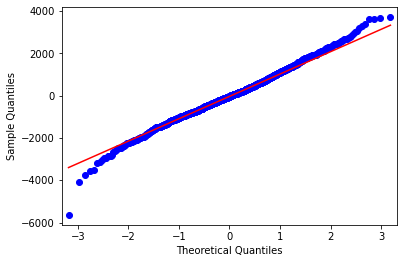

In [288]:
qqplot=sm.qqplot(model2.resid,line='q')
plt.show()

In [289]:
list(np.where(model2.resid<-3000))

[array([ 165,  366,  426,  611,  945, 1301, 1331, 1382], dtype=int64)]

In [290]:
list(np.where(model2.resid>3000))

[array([  99,  125,  135,  141,  152,  156,  653, 1007, 1010], dtype=int64)]

In [291]:
df1=df1.drop(df1.index[[165,  366,  426,  611,  945, 1301, 1331, 1382, 
                        99,  125,  135,  141,  152,  156,  653, 1007, 1010]],axis=0).reset_index()

In [292]:
df1.head()

,index,pr,ag,k,h,c,do,ge,qt,wt
0,0,13750,23,72937,90,2000,3,5,210,1165
1,1,13950,24,41711,90,2000,3,5,210,1165
2,2,14950,26,48000,90,2000,3,5,210,1165
3,3,13750,30,38500,90,2000,3,5,210,1170
4,4,12950,32,61000,90,2000,3,5,210,1170


In [293]:
df1=df1.drop('index',axis=1)

In [294]:
df1.head()

,pr,ag,k,h,c,do,ge,qt,wt
0,13750,23,72937,90,2000,3,5,210,1165
1,13950,24,41711,90,2000,3,5,210,1165
2,14950,26,48000,90,2000,3,5,210,1165
3,13750,30,38500,90,2000,3,5,210,1170
4,12950,32,61000,90,2000,3,5,210,1170


In [295]:
model3=smf.ols('pr~ag+k+h+c+do+ge+qt+wt',data=df1).fit()

In [296]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1421.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:19:34   Log-Likelihood:                -11445.
No. Observations:                1366   AIC:                         2.291e+04
Df Residuals:                    1357   BIC:                         2.295e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e+04   1377.711    -11.083      0.000    -1.8e+04   -1.26e+04
ag          -106.9807      2.269    -47.145      0.000    -111.432    -102.529
k             -0.0173      0.001    -16.033      0.000      -0.019      -0.015
h             29.8844      2.556     11.690      0.000      24.870      34.899
c             -3.3978      0.282    -12.050      0.000      -3.951      -2.845
do          -147.0762     33.682     -4.367      0.000    -213.151     -81.002
ge           409.1097    164.083      2.493      0.013      87.226     730.993
qt             1.9127      1.288      1.485      0.138      -0.614       4.440
wt            31.5457      1.321     23.875      0.000      28.954      34.138
==============================================================================
Omnibus:                        2.459   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.514
Skew:                           0.100   Prob(JB):                        0.284
Kurtosis:                       2.937   Cond. No.                     3.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

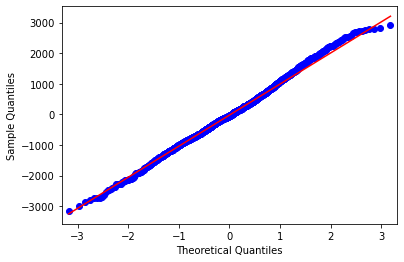

In [297]:
qqplot=sm.qqplot(model3.resid,line='q')
plt.show()

In [303]:
list(np.where(model3.resid<-3000))

[array([539], dtype=int64)]

In [304]:
df1=df1.drop(df1.index[[539]],axis=0).reset_index()

In [305]:
df1.head()

,index,pr,ag,k,h,c,do,ge,qt,wt
0,0,13750,23,72937,90,2000,3,5,210,1165
1,1,13950,24,41711,90,2000,3,5,210,1165
2,2,14950,26,48000,90,2000,3,5,210,1165
3,3,13750,30,38500,90,2000,3,5,210,1170
4,4,12950,32,61000,90,2000,3,5,210,1170


In [306]:
df1=df1.drop('index',axis=1)
df1.head()

,pr,ag,k,h,c,do,ge,qt,wt
0,13750,23,72937,90,2000,3,5,210,1165
1,13950,24,41711,90,2000,3,5,210,1165
2,14950,26,48000,90,2000,3,5,210,1165
3,13750,30,38500,90,2000,3,5,210,1170
4,12950,32,61000,90,2000,3,5,210,1170


In [308]:
model4=smf.ols('pr~ag+k+h+c+do+ge+qt+wt',data=df1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1431.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:30:23   Log-Likelihood:                -11432.
No. Observations:                1365   AIC:                         2.288e+04
Df Residuals:                    1356   BIC:                         2.293e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.548e+04   1375.400    -11.255      0.000   -1.82e+04   -1.28e+04
ag          -106.8432      2.263    -47.215      0.000    -111.282    -102.404
k             -0.0174      0.001    -16.124      0.000      -0.019      -0.015
h             29.5303      2.551     11.574      0.000      24.525      34.536
c             -3.4066      0.281    -12.116      0.000      -3.958      -2.855
do          -152.0334     33.622     -4.522      0.000    -217.990     -86.076
ge           406.4233    163.598      2.484      0.013      85.492     727.355
qt             1.6147      1.288      1.253      0.210      -0.912       4.142
wt            31.8432      1.321     24.104      0.000      29.252      34.435
==============================================================================
Omnibus:                        3.304   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.369
Skew:                           0.114   Prob(JB):                        0.185
Kurtosis:                       2.916   Cond. No.                     3.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

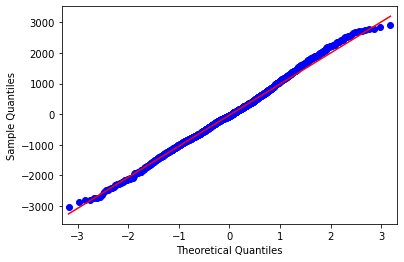

In [309]:
qqplot=sm.qqplot(model4.resid,line='q')
plt.show()

In [310]:
list(np.where(model4.resid<-3000))

[array([28], dtype=int64)]

In [311]:
list(np.where(model4.resid>3000))

[array([], dtype=int64)]

In [312]:
df1=df1.drop(df1.index[[28]],axis=0).reset_index()
df1.head()

,index,pr,ag,k,h,c,do,ge,qt,wt
0,0,13750,23,72937,90,2000,3,5,210,1165
1,1,13950,24,41711,90,2000,3,5,210,1165
2,2,14950,26,48000,90,2000,3,5,210,1165
3,3,13750,30,38500,90,2000,3,5,210,1170
4,4,12950,32,61000,90,2000,3,5,210,1170


In [313]:
df1=df1.drop('index',axis=1)
df1.head()

,pr,ag,k,h,c,do,ge,qt,wt
0,13750,23,72937,90,2000,3,5,210,1165
1,13950,24,41711,90,2000,3,5,210,1165
2,14950,26,48000,90,2000,3,5,210,1165
3,13750,30,38500,90,2000,3,5,210,1170
4,12950,32,61000,90,2000,3,5,210,1170


In [314]:
model5=smf.ols('pr~ag+k+h+c+do+ge+qt+wt',data=df1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1439.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:33:29   Log-Likelihood:                -11420.
No. Observations:                1364   AIC:                         2.286e+04
Df Residuals:                    1355   BIC:                         2.291e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.567e+04   1373.243    -11.413      0.000   -1.84e+04    -1.3e+04
ag          -106.8599      2.257    -47.352      0.000    -111.287    -102.433
k             -0.0174      0.001    -16.207      0.000      -0.020      -0.015
h             29.1428      2.548     11.438      0.000      24.144      34.141
c             -3.4128      0.280    -12.171      0.000      -3.963      -2.863
do          -157.0401     33.574     -4.677      0.000    -222.903     -91.177
ge           404.1462    163.152      2.477      0.013      84.089     724.204
qt             1.3020      1.289      1.010      0.313      -1.227       3.831
wt            32.1302      1.321     24.320      0.000      29.539      34.722
==============================================================================
Omnibus:                        4.098   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                4.163
Skew:                           0.125   Prob(JB):                        0.125
Kurtosis:                       2.898   Cond. No.                     3.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [324]:
pred_data=pd.DataFrame(df1)
model5.predict(pred_data)

0       15652.537784
1       16088.863922
2       15765.745042
3       15664.211979
4       15059.097694
            ...     
1358     9209.049455
1359     7699.463274
1360     9238.946834
1361     8623.923568
1362     8765.295748
Length: 1363, dtype: float64